# _**Placement**_ #

1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve

2. Load and Preprocess Data

In [4]:
df = pd.read_csv('data/Placement_Data_Full_Class.csv')

df.drop(['sl_no'], axis=1, inplace=True)

df['salary'] = df['salary'].fillna(0)

label_col = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
for col in label_col:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

3. EDA

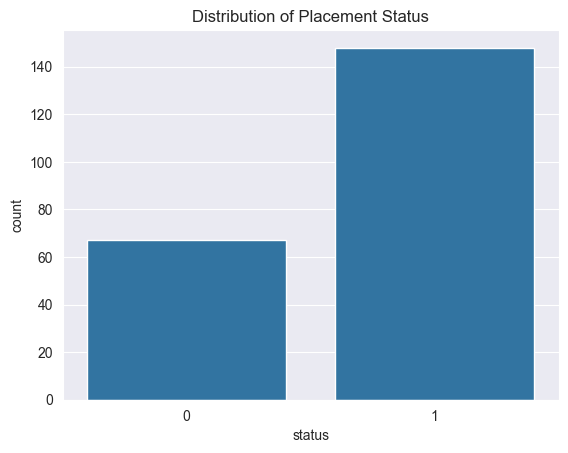

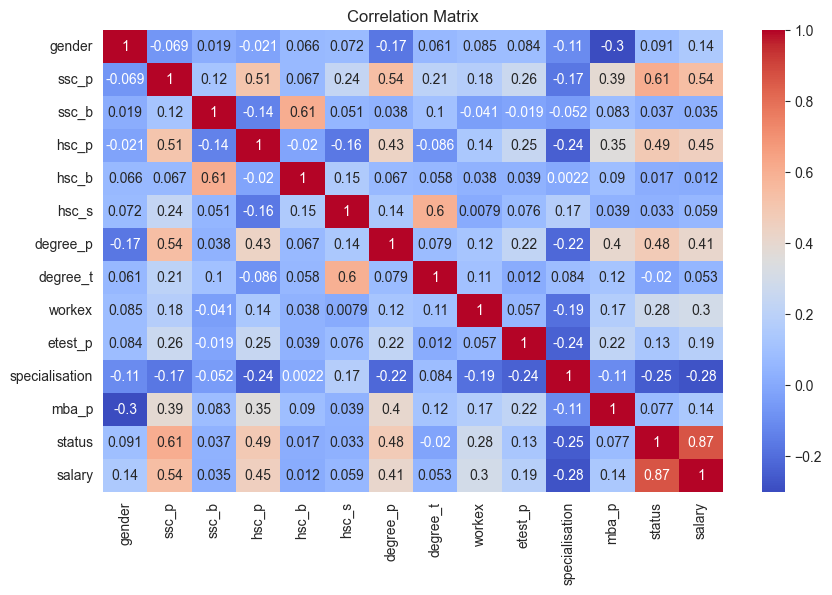

In [6]:
df.describe()

sns.countplot(x='status', data=df)
plt.title("Distribution of Placement Status")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

4. Prepare Data 

In [8]:
x = df.drop(['status','salary'], axis=1)
y = df['status']

num_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
scaler = StandardScaler()
x[num_cols] = scaler.fit_transform(x[num_cols])


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

5. Logistic Regression

Classification Report:               precision    recall  f1-score   support

           0       0.76      0.76      0.76        17
           1       0.85      0.85      0.85        26

    accuracy                           0.81        43
   macro avg       0.81      0.81      0.81        43
weighted avg       0.81      0.81      0.81        43



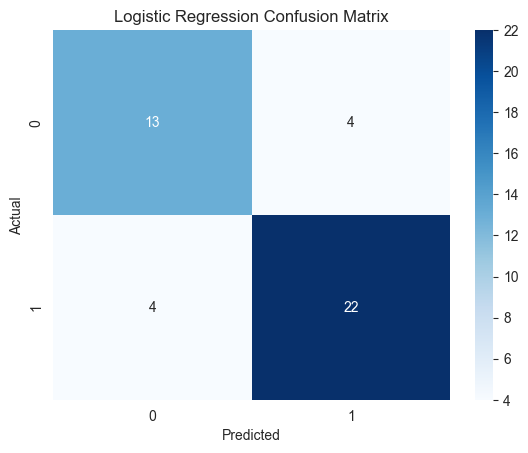

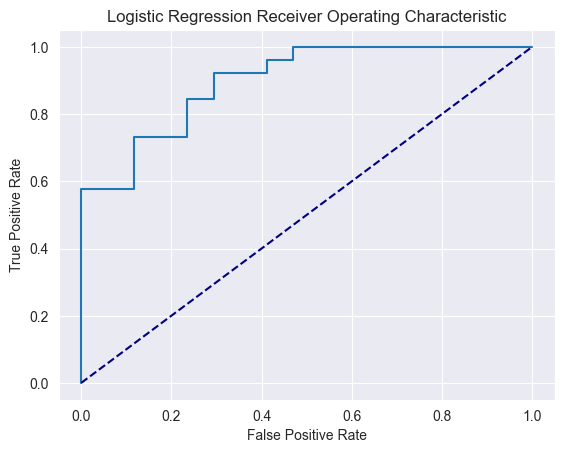

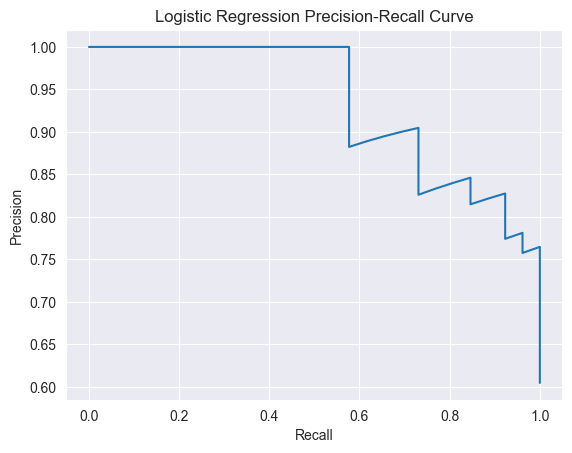

In [12]:
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)
lg_pred = lg_model.predict(x_test)
lg_prob = lg_model.predict_proba(x_test)[:, 1]

print("Classification Report:", classification_report(y_test, lg_pred))

cm = confusion_matrix(y_test, lg_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, lg_prob)
auc = roc_auc_score(y_test, lg_prob)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Receiver Operating Characteristic')
plt.show()

prec, rec, thr = precision_recall_curve(y_test, lg_prob)
plt.plot(rec, prec, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression Precision-Recall Curve')
plt.show()

6. Naive Bayes

Classification Report:               precision    recall  f1-score   support

           0       0.71      0.71      0.71        17
           1       0.81      0.81      0.81        26

    accuracy                           0.77        43
   macro avg       0.76      0.76      0.76        43
weighted avg       0.77      0.77      0.77        43



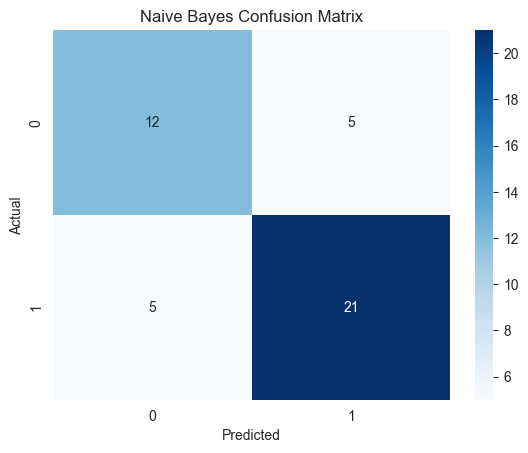

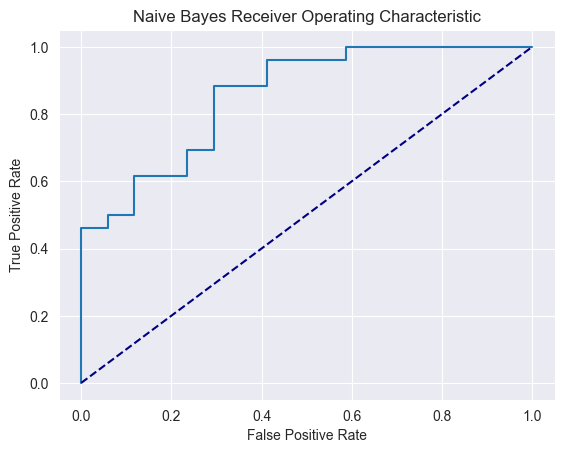

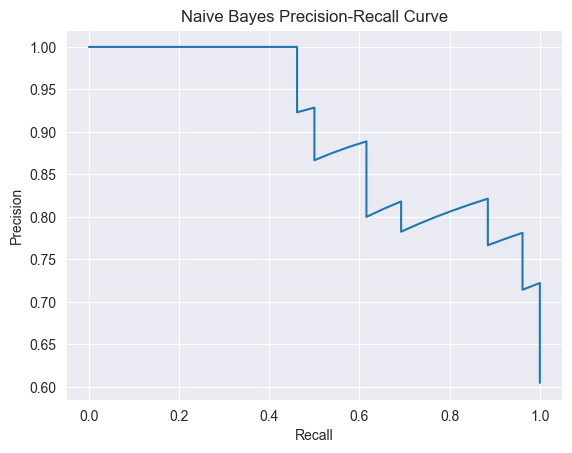

In [13]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)
NB_pred = NB_model.predict(x_test)
NB_Prob = NB_model.predict_proba(x_test)[:, 1]

print("Classification Report:", classification_report(y_test, NB_pred))

cm = confusion_matrix(y_test, NB_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, NB_Prob)
auc = roc_auc_score(y_test, NB_Prob)
plt.plot(fpr, tpr, label='Naive Bayes (AUC = {:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Receiver Operating Characteristic')
plt.show()

prec, rec, thr = precision_recall_curve(y_test, NB_Prob)
plt.plot(rec, prec, label='Naive Bayes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Naive Bayes Precision-Recall Curve')
plt.show()

7. Linear Discriminative Analysis 

Classification Report:               precision    recall  f1-score   support

           0       0.81      0.76      0.79        17
           1       0.85      0.88      0.87        26

    accuracy                           0.84        43
   macro avg       0.83      0.82      0.83        43
weighted avg       0.84      0.84      0.84        43



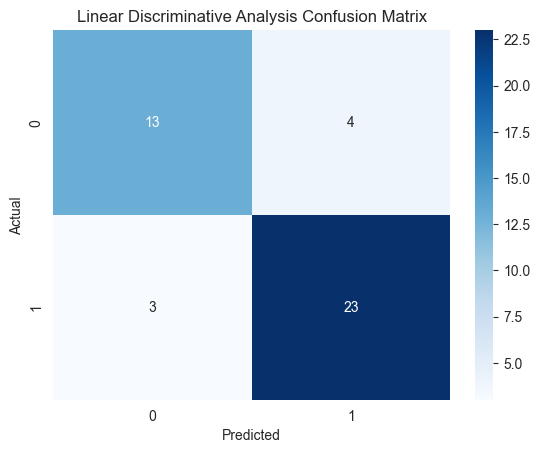

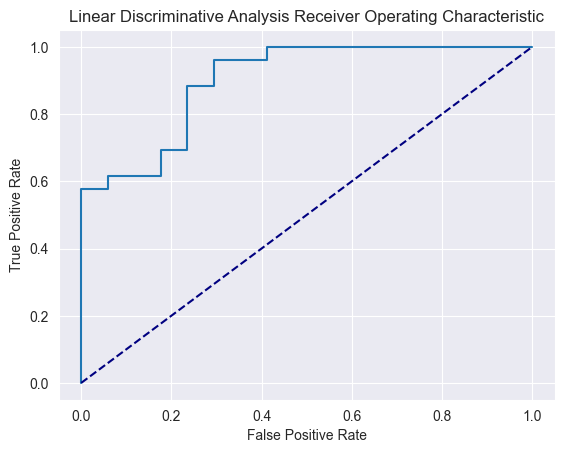

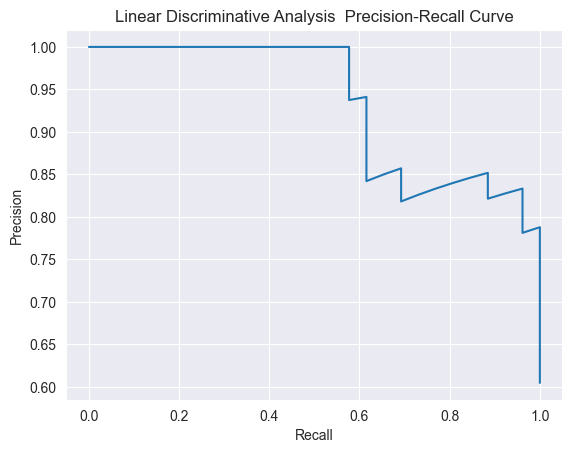

In [14]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(x_train, y_train)
LDA_pred = LDA_model.predict(x_test)
LDA_Prob = LDA_model.predict_proba(x_test)[:, 1]

print("Classification Report:", classification_report(y_test, LDA_pred))

cm = confusion_matrix(y_test, LDA_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Linear Discriminative Analysis Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, LDA_Prob)
auc = roc_auc_score(y_test, LDA_Prob)
plt.plot(fpr, tpr, label='Linear Discriminative Analysis  (AUC = {:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear Discriminative Analysis Receiver Operating Characteristic')
plt.show()

prec, rec, thr = precision_recall_curve(y_test, LDA_Prob)
plt.plot(rec, prec, label='Linear Discriminative Analysis')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Linear Discriminative Analysis  Precision-Recall Curve')
plt.show()

8. Cross-Validation

In [18]:
lg_score = cross_val_score(lg_model, x, y, cv=5, scoring='f1')
NB_score = cross_val_score(NB_model, x, y, cv=5, scoring='f1')
LDA_score = cross_val_score(LDA_model, x, y, cv=5, scoring='f1')

print("Accuracy on Logistic Regression: ", lg_score.mean())
print("Accuracy on Naive Bayes: ", NB_score.mean())
print("Accuracy on Linear Discriminative Analysis: ", LDA_score.mean())

Accuracy on Logistic Regression:  0.8954267731211148
Accuracy on Naive Bayes:  0.8472334682860998
Accuracy on Linear Discriminative Analysis:  0.903722423011652


9. Regularization

In [19]:
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear')
lr_l1.fit(x_train, y_train)
print('L1-Regularization Logistic Regression:', classification_report(y_test, lr_l1.predict(x_test)))

lr_l2 = LogisticRegression(penalty='l2', solver='liblinear')
lr_l2.fit(x_train, y_train)
print('L2-Regularization Logistic Regression:', classification_report(y_test, lr_l2.predict(x_test)))

L1-Regularization Logistic Regression:               precision    recall  f1-score   support

           0       0.71      0.71      0.71        17
           1       0.81      0.81      0.81        26

    accuracy                           0.77        43
   macro avg       0.76      0.76      0.76        43
weighted avg       0.77      0.77      0.77        43

L2-Regularization Logistic Regression:               precision    recall  f1-score   support

           0       0.76      0.76      0.76        17
           1       0.85      0.85      0.85        26

    accuracy                           0.81        43
   macro avg       0.81      0.81      0.81        43
weighted avg       0.81      0.81      0.81        43

